# Breast Cancer Coimbra Data Set

The dataset was obtainded from http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra


Data Set Information:

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.

The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.


Attribute Information:

Quantitative Attributes:
* Age (years)
* BMI (kg/m2)
* Glucose (mg/dL)
* Insulin (µU/mL)
* HOMA
* Leptin (ng/mL)
* Adiponectin (µg/mL)
* Resistin (ng/mL)
* MCP-1(pg/dL)

Labels:

1=Healthy controls

2=Patients



## Objectives

All the relevant information about the data is described above. For more information about the columns information just click on the link and read the description.

Having chosen the data it's time to define the objectives, wich are very simple:
* Do summary statistics on the patients data
* Check for missing values (and address them)
* Create a supervised machine learning model to predict the presence or absence of breast cancer

### Load the libraries
First we will need to load the necessary libraries to analyse the data and create the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data
Next we will import the data that is in a `.csv` file named `dataR2.csv`, and will be named `cancer_data`.

In [6]:
cancer_data = pd.read_csv("dataR2.csv")

print(cancer_data.head())
print("\n", cancer_data.columns)
print("\n", len(cancer_data))
print("\n", cancer_data.dtypes)

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  

 Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

 116

 Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Re

## Summary statistic

In order to better inspect the influence of some factors we will create some plot and obtain some statistiscs on the columns.

The last column (`Classification`) indicates if the patient has cancer (1) or if it's from the control group (2). This column will be used to separate the dataset into to two, making it easier to see the distributions.

In [11]:
cancer = cancer_data[cancer_data["Classification"] == 1].reset_index()
no_cancer = cancer_data[cancer_data["Classification"] == 2].reset_index()

print(cancer.head())
print("\n", no_cancer.head())

   index  Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0      0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1      1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2      2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3      3   68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4      4   86  21.111111       92    3.549  0.805386   6.6994     4.819240   

   Resistin    MCP.1  Classification  
0   7.99585  417.114               1  
1   4.06405  468.786               1  
2   9.27715  554.697               1  
3  12.76600  928.220               1  
4  10.57635  773.920               1  

    index  Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     52   45  21.303949      102   13.852  3.485163   7.6476    21.056625   
1     53   45  20.829995       74    4.560  0.832352   7.7529     8.237405   
2     54   49  20.956608       94   12.305  2.853119  11.2406

### Distributions

First let's see the distribution of the variables on the `cancer` dataframe:
* Histograms
* Boxplots
* Means
* Medians
* Standard deviations

In [46]:
#Means, medians and standard deviations
def summary(data):
    for i in range(1, len(data.columns) - 1):
        mean = np.mean(data[data.columns[i]])
        median = np.median(data[data.columns[i]])
        std = np.std(np.array([data[data.columns[i]]]))
        print("{0} mean: {1}".format(data.columns[i], mean))
        print("{0} median: {1}".format(data.columns[i], median))
        print("{0} standard deviation: {1}\n".format(data.columns[i], std))
        
summary(cancer)

Age mean: 58.07692307692308
Age median: 65.0
Age standard deviation: 18.77482577389832

BMI mean: 28.317336260576916
BMI median: 27.694389065
BMI standard deviation: 5.375024619923628

Glucose mean: 88.23076923076923
Glucose median: 87.0
Glucose standard deviation: 10.093058133450294

Insulin mean: 6.9337692307692285
Insulin median: 5.4835
Insulin standard deviation: 4.812837131509633

HOMA mean: 1.5523977114999998
HOMA median: 1.139682633
HOMA standard deviation: 1.206485234969583

Leptin mean: 26.63793269230769
Leptin median: 21.49485
Leptin standard deviation: 19.147885457384678

Adiponectin mean: 10.328205096153848
Adiponectin median: 8.127775
Adiponectin standard deviation: 7.557546798529974

Resistin mean: 11.614813461538464
Resistin median: 8.92919
Resistin standard deviation: 11.336450908185483

MCP.1 mean: 499.7306923076924
MCP.1 median: 471.3225
MCP.1 standard deviation: 289.41849477447136



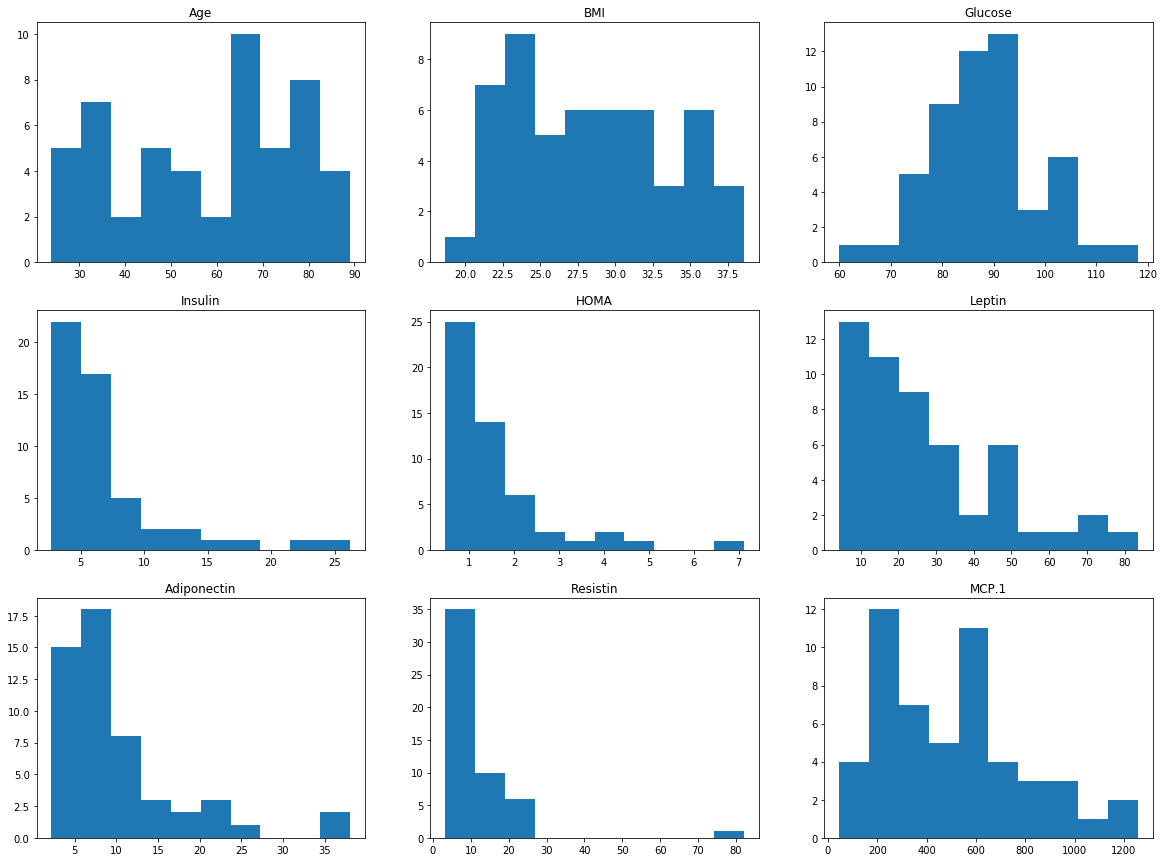

In [56]:
#histograms
def histogram_dist(data):
    plt.figure(figsize = (20, 15))
    for i in range(1, len(data.columns) - 1):
        ax = plt.subplot(3, 3, i)
        plt.hist(data[data.columns[i]])
        plt.title(data.columns[i])
        
histogram_dist(cancer)

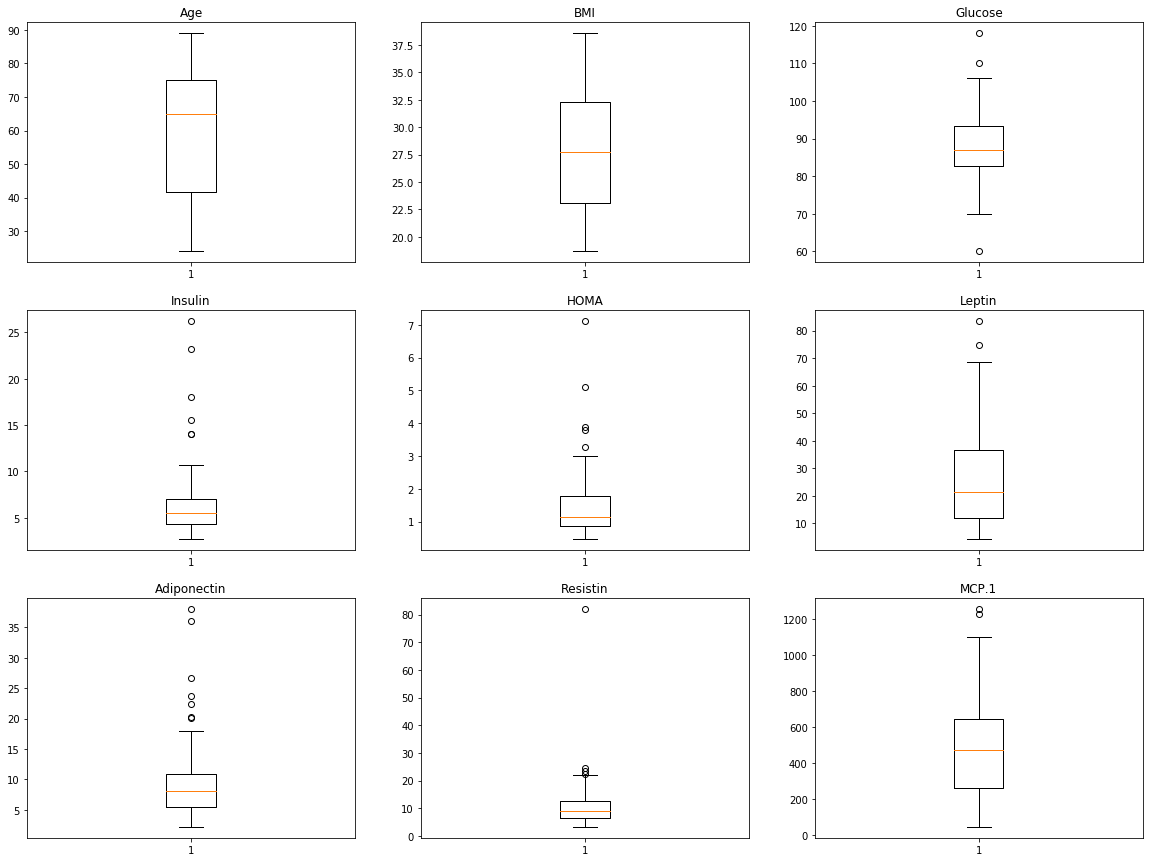

In [57]:
#boxplots
def box_dist(data):
    plt.figure(figsize = (20, 15))
    for i in range(1, len(data.columns) - 1):
        ax = plt.subplot(3, 3, i)
        plt.boxplot(data[data.columns[i]])
        plt.title(data.columns[i])
        
box_dist(cancer)